<a href="https://colab.research.google.com/github/SDRIYAZ/DEEP-LEARNING-ANN/blob/main/Deep_Learning_(YB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN

#How to Select Hidden Layers And Number of Hidden Neurons in ANN


In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
data=pd.read_csv('Real_Combine.csv')

In [ ]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.631462
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.568409
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.673824
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.623187
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.138005
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.573941
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.268530
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


In [ ]:
import seaborn as sns

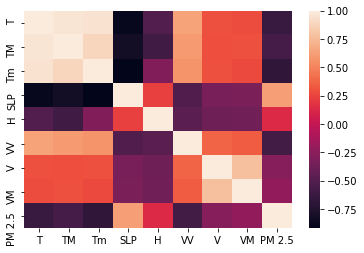

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:
x=data.iloc[:,:-1] #independent features
y=data.iloc[:,-1] #dependent features

#Hyperparameters
  1.how many number of Hidden layers we should have?<br>
  2.How many number of neurons we should have in Hidden layers?<br>
  3.Learning Rate

In [ ]:
def build_model(ap):
    model = keras.Sequential()
    for i in range(ap.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=ap.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            ap.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
tuner.search(x_train,y_train,
             epochs=5,
             validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 04s]
val_mean_absolute_error: nan

Best val_mean_absolute_error So Far: nan
Total elapsed time: 00h 00m 27s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project/Air Quality Index
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 11
units_0: 416
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 16
units_0: 256
units_1: 320
learning_rate: 0.0001
units_2: 320
units_3: 416
units_4: 224
units_5: 352
units_6: 480
units_7: 416
units_8: 448
units_9: 128
units_10: 416
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 18
units_0: 224
units_1: 480
learning_rate: 0.0001
units_2: 352
units_3: 64
units_4: 320
units_5: 320
units_6: 384
units_7: 288
units_8: 64
units_9: 288
units_10: 352
units_11: 128
units_12: 352
units_13: 448
units_14: 160
units_15: 416
units_16: 32
units_17: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 5
uni

# How To Decide Number of Hidden Layers in  Neural Network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dropout

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

## Concatenate the Data Frames

x=pd.concat([x,geography,gender],axis=1)

## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,LeakyReLU,BatchNormalization
from keras.activations import relu,sigmoid

In [ ]:
def create_model(layers,activation):
  model=Sequential()
  for i,nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes,input_dim=x_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
    else:
     model.add(Dense(nodes))
     model.add(Activation(activation))
     model.add(Dropout(0.3))


  model.add(Dense(units=1,kernel_initializer='lecun_uniform',activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model


model = KerasClassifier(build_fn=create_model,verbose=0)

layers=[[20],[40,20],[45,30,15]]
activations=['sigmoid','relu']
param_grid =dict(layers=layers,activation=activations,batch_size=[128,256],epochs=[30])
grid= GridSearchCV(estimator=model,param_grid=param_grid,cv=5,return_train_score=True)
grid_result=grid.fit(x_train,y_train)
print(grid_result,grid_result)



#Creating ANN Using Weight Initialization trick

In [ ]:
!pip install -q keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('Churn_Modelling.csv')
x=data.iloc[:,3:13]
y=data.iloc[:,13]

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Create Dummy Variables
geogaphy=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
x=pd.concat([x,geogaphy,gender],axis=1)

In [ ]:
x=x.drop(['Geography','Gender'],axis=1) #Dropping the unnecessary columns

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#part-2 Making the ANN

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()



In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5345 - accuracy: 0.7990 - val_loss: 0.4999 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4998 - accuracy: 0.7943 - val_loss: 0.4952 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4882 - accuracy: 0.7951 - val_loss: 0.4901 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4980 - accuracy: 0.7867 - val_loss: 0.4849 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4944 - accuracy: 0.7859 - val_loss: 0.4797 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4711 - accuracy: 0.7955 - val_loss: 0.4748 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7999 - val_loss: 0.4708 - val_accuracy: 0.7955

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


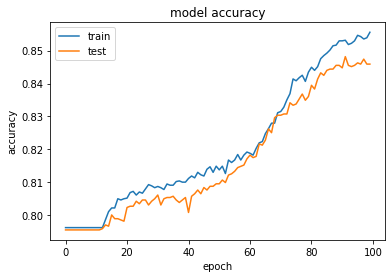

In [ ]:
print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



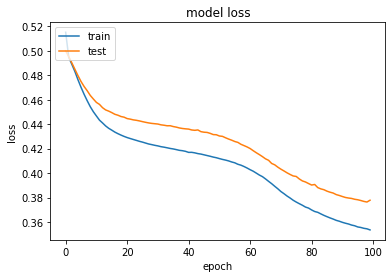

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results

y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)



In [ ]:
print(cm)
print(score)

[[1526   69]
 [ 232  173]]
0.8495


# Create Image Dataset using Data Augmentation using Keras-Deep Learning

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/Data Augmented cat image.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/home', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Transfer Learning  Using - VGG16,RESNET

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
!pip install -q keras

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False 
   # useful for getting number of classes
folders = glob('Datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

 

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


FileNotFoundError: ignored

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')


NameError: ignored

#Word Embedding Techniques UsingEmbedding Layer in keras

In [1]:
from keras.preprocessing.text import one_hot

In [2]:
sent={
    'the glass of milk',
    'the cup of tea',
    'i am a good boy',
    'i am a good developer',
    'understand the meaning of word',
    'your are good'
}

In [3]:
sent

{'i am a good boy',
 'i am a good developer',
 'the cup of tea',
 'the glass of milk',
 'understand the meaning of word',
 'your are good'}

In [4]:
voc_size=10000

###One Hot Representation

In [5]:
onehot_rep=[one_hot(words,voc_size)for words in sent]
print(onehot_rep)

[[7807, 2013, 5840, 8224], [9427, 7807, 1049, 5840, 3081], [3142, 7915, 8128], [7807, 2954, 5840, 4312], [1359, 3257, 5853, 8128, 7410], [1359, 3257, 5853, 8128, 1879]]


###Word Embedding Representation

In [7]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [8]:
import numpy as np

In [10]:
sent_length=8
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
#If we dont mention (padding=pre) 0's are added at the end
print(embedded_docs)

[[   0    0    0    0 7807 2013 5840 8224]
 [   0    0    0 9427 7807 1049 5840 3081]
 [   0    0    0    0    0 3142 7915 8128]
 [   0    0    0    0 7807 2954 5840 4312]
 [   0    0    0 1359 3257 5853 8128 7410]
 [   0    0    0 1359 3257 5853 8128 1879]]


In [11]:
dim=15

In [14]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 10)             100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [16]:
print(model.predict(embedded_docs))

[[[-4.90379445e-02  2.38978527e-02 -3.68260853e-02 -3.67997885e-02
    1.70457102e-02 -3.71330492e-02  3.93377654e-02  3.94498371e-02
    4.50169109e-02 -4.77946065e-02]
  [-4.90379445e-02  2.38978527e-02 -3.68260853e-02 -3.67997885e-02
    1.70457102e-02 -3.71330492e-02  3.93377654e-02  3.94498371e-02
    4.50169109e-02 -4.77946065e-02]
  [-4.90379445e-02  2.38978527e-02 -3.68260853e-02 -3.67997885e-02
    1.70457102e-02 -3.71330492e-02  3.93377654e-02  3.94498371e-02
    4.50169109e-02 -4.77946065e-02]
  [-4.90379445e-02  2.38978527e-02 -3.68260853e-02 -3.67997885e-02
    1.70457102e-02 -3.71330492e-02  3.93377654e-02  3.94498371e-02
    4.50169109e-02 -4.77946065e-02]
  [ 3.31664346e-02 -2.74234414e-02 -2.18278058e-02 -4.29143794e-02
   -4.46959585e-03  2.30494626e-02  4.27258275e-02 -4.77983467e-02
   -4.28308249e-02  3.91261019e-02]
  [ 4.63461615e-02  1.67823918e-02  2.77184285e-02  6.08938932e-03
    1.42996646e-02  1.75277144e-03 -7.13126734e-03  1.49189495e-02
    2.13672780e-

In [17]:
embedded_docs[0]

array([   0,    0,    0,    0, 7807, 2013, 5840, 8224], dtype=int32)

In [19]:
print(model.predict(embedded_docs[0]))
#THIS 0 HAS DIVIDED INTO 10  VECTORS BECAUSE WE HAVE MENTIONED DIMENSONS=10

[[[-0.04903794  0.02389785 -0.03682609 -0.03679979  0.01704571
   -0.03713305  0.03933777  0.03944984  0.04501691 -0.04779461]]

 [[-0.04903794  0.02389785 -0.03682609 -0.03679979  0.01704571
   -0.03713305  0.03933777  0.03944984  0.04501691 -0.04779461]]

 [[-0.04903794  0.02389785 -0.03682609 -0.03679979  0.01704571
   -0.03713305  0.03933777  0.03944984  0.04501691 -0.04779461]]

 [[-0.04903794  0.02389785 -0.03682609 -0.03679979  0.01704571
   -0.03713305  0.03933777  0.03944984  0.04501691 -0.04779461]]

 [[ 0.03316643 -0.02742344 -0.02182781 -0.04291438 -0.0044696
    0.02304946  0.04272583 -0.04779835 -0.04283082  0.0391261 ]]

 [[ 0.04634616  0.01678239  0.02771843  0.00608939  0.01429966
    0.00175277 -0.00713127  0.01491895  0.02136728  0.03762319]]

 [[ 0.01536481 -0.02608215 -0.04813344 -0.02832949  0.04242424
    0.01590217 -0.01217105  0.00328585  0.04309777  0.03350076]]

 [[ 0.03120175 -0.04815785  0.00936434  0.0380169  -0.03889262
    0.01998954  0.04102416 -0.02509

#Stock Market Prediction And Forecasting Using  Stacked LSTM

###Collect the stock data

In [25]:
import pandas_datareader as pdr
import os

In [20]:
help(pdr.get_data_tiingo)

Help on function get_data_tiingo in module pandas_datareader.data:

get_data_tiingo(*args, **kwargs)



In [49]:
df=pdr.get_data_tiingo('AAPL',api_key='46776dfad2112a02d649d6ac7a01d1914276d74f')

In [38]:
df.head(5)

close    high  ...  divCash  splitFactor
symbol date                                      ...                      
AAPL   2016-07-20 00:00:00+00:00  99.96  100.46  ...      0.0          1.0
       2016-07-21 00:00:00+00:00  99.43  101.00  ...      0.0          1.0
       2016-07-22 00:00:00+00:00  98.66   99.30  ...      0.0          1.0
       2016-07-25 00:00:00+00:00  97.34   98.84  ...      0.0          1.0
       2016-07-26 00:00:00+00:00  96.67   97.97  ...      0.0          1.0

[5 rows x 12 columns]

In [39]:
df.to_csv('AAPL.csv')

In [40]:
import pandas as pd

In [43]:
df=pd.read_csv('AAPL.csv')

In [50]:
df2=df.reset_index()['close']

In [51]:
df2[1228:]

1228    125.90
1229    126.74
1230    127.13
1231    126.11
1232    127.35
1233    130.48
1234    129.64
1235    130.15
1236    131.79
1237    130.46
1238    132.30
1239    133.98
1240    133.70
1241    133.41
1242    133.11
1243    134.78
1244    136.33
1245    136.96
1246    137.27
1247    139.96
1248    142.02
1249    144.57
1250    143.24
1251    145.11
1252    144.50
1253    145.64
1254    149.15
1255    148.48
1256    146.39
Name: close, dtype: float64

In [54]:
df2.shape

(1257,)

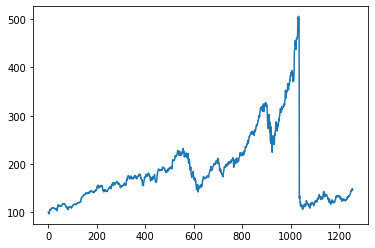

In [56]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [57]:
import numpy as np


In [58]:
#We apply MinMax Scalar (in this we transform values between 0 to 1  )
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

###Preprocess the Data -Train and test

In [60]:
#splitting dataset into train test split
train_size=int(len(df2)*0.65)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size,:],df2[train_size:len(df2),:1]

In [62]:
train_size,test_size

(817, 440)

In [63]:
train_data

array([[0.00803576],
       [0.00674124],
       [0.00486053],
       [0.00163646],
       [0.        ],
       [0.01533877],
       [0.01873382],
       [0.0184163 ],
       [0.02291046],
       [0.01907577],
       [0.02227541],
       [0.02247081],
       [0.0264032 ],
       [0.02857701],
       [0.0296517 ],
       [0.02767329],
       [0.02750232],
       [0.02811294],
       [0.03128816],
       [0.03104392],
       [0.03065312],
       [0.03031117],
       [0.03099507],
       [0.02891896],
       [0.0297494 ],
       [0.02774657],
       [0.02662303],
       [0.02508427],
       [0.02479117],
       [0.02278833],
       [0.02303258],
       [0.02457134],
       [0.02701382],
       [0.02694055],
       [0.02855259],
       [0.02161594],
       [0.01577842],
       [0.02142055],
       [0.02755117],
       [0.03688144],
       [0.04616286],
       [0.04457525],
       [0.04130233],
       [0.04127791],
       [0.04122906],
       [0.04384251],
       [0.03917737],
       [0.039

In [69]:
import numpy as np
def create_dataset(dataset,time_step=1):
  dataX,dataY =[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [70]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [71]:
print(x_train)

[[0.00803576 0.00674124 0.00486053 ... 0.03243613 0.03507401 0.03773631]
 [0.00674124 0.00486053 0.00163646 ... 0.03507401 0.03773631 0.04220605]
 [0.00486053 0.00163646 0.         ... 0.03773631 0.04220605 0.04061844]
 ...
 [0.21965219 0.21032192 0.20270138 ... 0.31197792 0.31840164 0.32587563]
 [0.21032192 0.20270138 0.20101607 ... 0.31840164 0.32587563 0.3408236 ]
 [0.20270138 0.20101607 0.19920864 ... 0.32587563 0.3408236  0.33999316]]


In [73]:
x_train.shape,y_train.shape

((716, 100), (716,))

In [72]:
x_test.shape,y_test.shape

((339, 100), (339,))

In [76]:
#Reshape input to be [samples,time steps,features] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

###Creating the stacked LSTM model

In [80]:
#Create the Stack  LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [78]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 263ms/step - loss: 0.0067 - val_loss: 0.0372
Epoch 2/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0019 - val_loss: 0.0243
Epoch 3/100
12/12 [==============================] - 2s 168ms/step - loss: 9.0043e-04 - val_loss: 0.0212
Epoch 4/100
12/12 [==============================] - 2s 170ms/step - loss: 6.2490e-04 - val_loss: 0.0199
Epoch 5/100
12/12 [==============================] - 2s 168ms/step - loss: 4.6032e-04 - val_loss: 0.0201
Epoch 6/100
12/12 [==============================] - 2s 164ms/step - loss: 4.4546e-04 - val_loss: 0.0196
Epoch 7/100
12/12 [==============================] - 2s 173ms/step - loss: 4.0738e-04 - val_loss: 0.0192
Epoch 8/100
12/12 [==============================] - 2s 177ms/step - loss: 3.9434e-04 - val_loss: 0.0185
Epoch 9/100
12/12 [==============================] - 2s 166ms/step - loss: 3.8127e-04 - val_loss: 0.0182
Epoch 10/100
12/12 [==============================] - 2s 164ms/

In [82]:
import tensorflow as tf

In [83]:
tf.__version__

'2.5.0'

In [84]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [86]:
#transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [89]:
#Calcuating RMSE performance metrics 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

72220.14984008721

In [90]:
math.sqrt(mean_squared_error(y_test,test_predict))

232.5073421484917

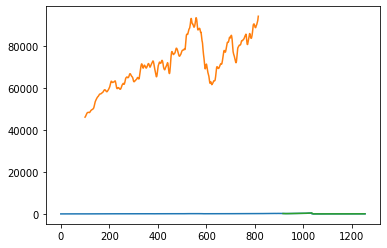

In [119]:
### Plotting 
import numpy
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [101]:
len(test_data)

440

In [102]:

x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [104]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [106]:
temp_input

[0.05940110400078158,
 0.060060573494211345,
 0.07600996531678961,
 0.0694885447706512,
 0.06201455717844756,
 0.05730057154022761,
 0.060451370231058565,
 0.048092423428264364,
 0.05963313956328464,
 0.056934199599433355,
 0.061770309217917985,
 0.0594988031849934,
 0.06672854281666746,
 0.07058766059303401,
 0.06860925211274488,
 0.05827756338234574,
 0.05695862439548627,
 0.06526305505349028,
 0.06318694738898933,
 0.057202872356015844,
 0.0584241121586635,
 0.05993844951394656,
 0.060378095842899715,
 0.05673880123100972,
 0.06223438034292417,
 0.06431048800742512,
 0.07139367886278153,
 0.072150847540423,
 0.0762786380733721,
 0.08228713790239855,
 0.0887230716623516,
 0.08443651995505841,
 0.09222802989595041,
 0.08636607884324166,
 0.09239900346832103,
 0.09156856040252065,
 0.09322944653412146,
 0.0890039568169606,
 0.08995652386302572,
 0.0861462556787651,
 0.09195935713936787,
 0.092936348981486,
 0.09213033071173854,
 0.09015192223144941,
 0.08990767427091984,
 0.08497386546

In [110]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


0 day input [0.06006057 0.07600997 0.06948854 0.06201456 0.05730057 0.06045137
 0.04809242 0.05963314 0.0569342  0.06177031 0.0594988  0.06672854
 0.07058766 0.06860925 0.05827756 0.05695862 0.06526306 0.06318695
 0.05720287 0.05842411 0.05993845 0.0603781  0.0567388  0.06223438
 0.06431049 0.07139368 0.07215085 0.07627864 0.08228714 0.08872307
 0.08443652 0.09222803 0.08636608 0.092399   0.09156856 0.09322945
 0.08900396 0.08995652 0.08614626 0.09195936 0.09293635 0.09213033
 0.09015192 0.08990767 0.08497387 0.08761174 0.07615651 0.07676713
 0.0807728  0.08192077 0.07371403 0.0714181  0.06374872 0.06912217
 0.07517952 0.0722974  0.06882908 0.06843828 0.07483758 0.07024571
 0.07432465 0.07383616 0.07371403 0.06987934 0.06824288 0.06743686
 0.069342   0.06562943 0.07136925 0.07139368 0.07344536 0.07439793
 0.0719066  0.07493527 0.08258024 0.08052855 0.08177422 0.08577988
 0.08253139 0.08702555 0.09112891 0.09044502 0.0897367  0.08900396
 0.0930829  0.09686874 0.0984075  0.09916467 0.105

In [111]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [112]:
import matplotlib.pyplot as plt

In [113]:
len(df2)

1257

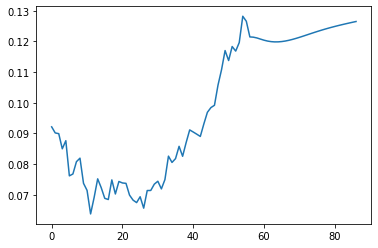

In [125]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [122]:
df3=scaler.inverse_transform(df3).tolist()

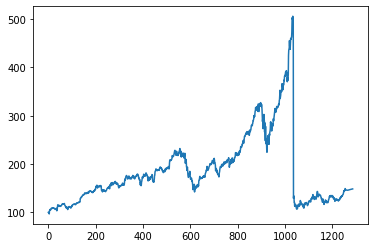

In [123]:
plt.plot(df3)